In [1]:
# Titanic Dataset - Final Clean Notebook
# Author: Abhijit Tele
# Task: Data Cleaning, Feature Engineering, EDA

# =============================
# 1. Import Libraries
# =============================
import pandas as pd
import numpy as np

# =============================
# 2. Load Dataset
# =============================
df = pd.read_csv("Titanic-Dataset.csv")

print("Shape of dataset:", df.shape)
df.head()

# =============================
# 3. Basic Info & Missing Values
# =============================
df.info()
print("\nMissing values before cleaning:\n", df.isnull().sum())

# =============================
# 4. Check for Duplicates
# =============================
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# =============================
# 5. Handle Missing Values
# =============================

# Fill missing Age with median of each (Sex, Pclass) group
df['Age'] = df.groupby(['Sex', 'Pclass'], observed=False)['Age'] \
              .transform(lambda x: x.fillna(x.median()))

# Fallback: fill any remaining Age with overall median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (most frequent)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Fare (if any) with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

print("\nMissing values after cleaning:\n", df.isnull().sum())

# =============================
# 6. Feature Engineering
# =============================

# 6.1 Cabin Information
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df['CabinLetter'] = df['Cabin'].str[0]

# 6.2 Family Features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 6.3 Extract Title from Name
df['Title'] = df['Name'].str.extract(',\s*([^.]*)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss').replace('Mme', 'Mrs')
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Other')

# 6.4 Age and Fare Bands
df['AgeBand'] = pd.cut(df['Age'],
                       bins=[0, 12, 20, 40, 60, 100],
                       labels=['Child', 'Teen', 'Adult', 'Senior', 'Elder'])
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=False)

# =============================
# 7. Exploratory Data Analysis
# =============================

# Example: Survival rate by Age Band
print("\nSurvival Rate by Age Band:")
print(df.groupby('AgeBand', observed=False)['Survived'].mean())

# Example: Survival rate by Sex
print("\nSurvival Rate by Sex:")
print(df.groupby('Sex', observed=False)['Survived'].mean())

# =============================
# 8. Final Dataset Overview
# =============================
print("\nFinal dataset shape:", df.shape)
df.head()

# =============================
# 9. Save Cleaned Dataset
# =============================
df.to_csv("Titanic_Cleaned.csv", index=False)
print("\nCleaned dataset saved as Titanic_Cleaned.csv")


Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare       

In [2]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Title extraction from Name
df['Title'] = df['Name'].str.extract(',\s*([^.]*)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Other')

# Age band (categorical ranges)
df['AgeBand'] = pd.cut(df['Age'], bins=[0,12,20,40,60,100],
                       labels=['Child','Teen','Adult','Senior','Elder'])

# Fare quartiles
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=False)

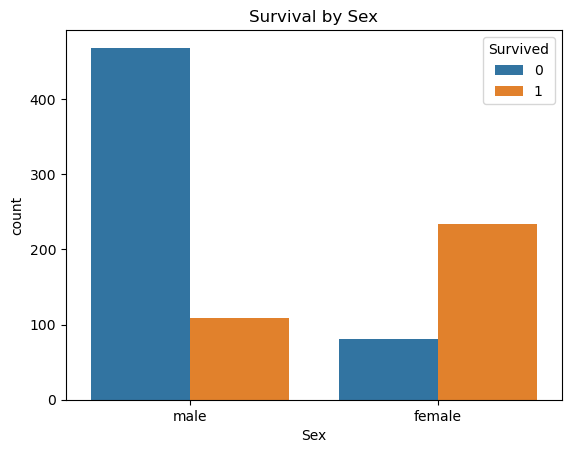

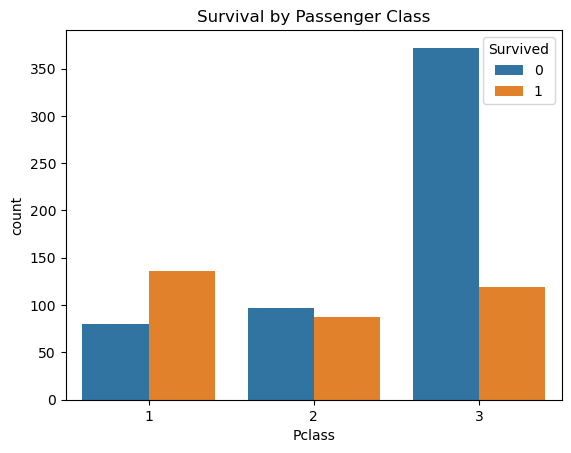

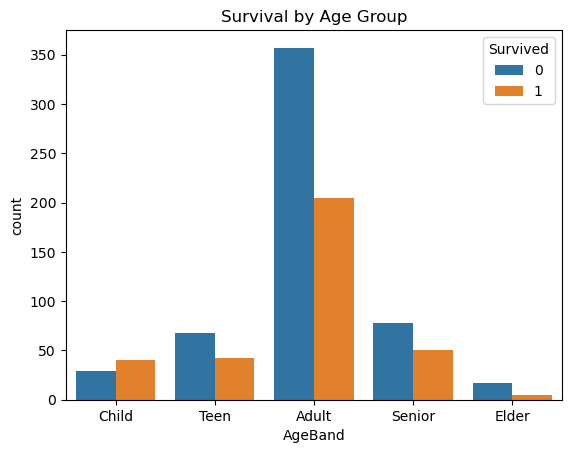

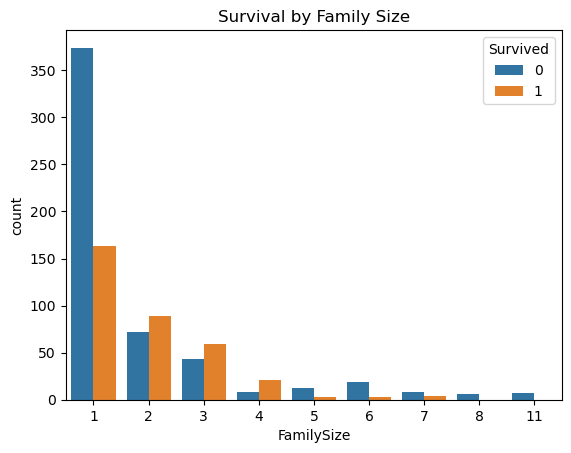

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Survival by AgeBand
sns.countplot(x='AgeBand', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.show()

# Survival by Family Size
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


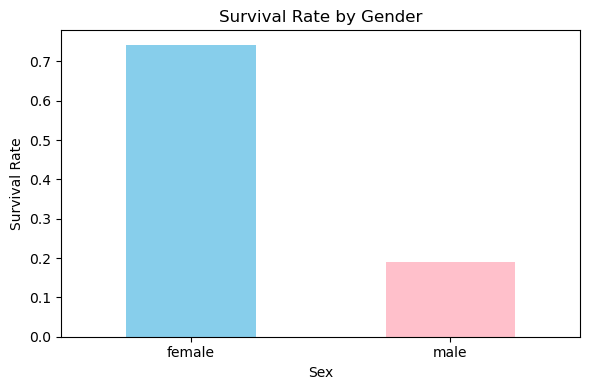


Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


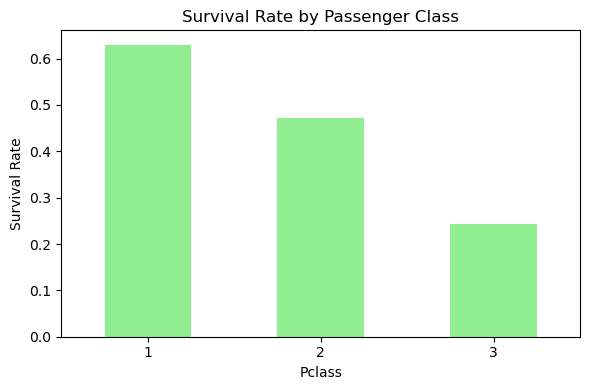


Survival Rate by Gender & Class:
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Pivot Table - Survival Rate by Gender & Class:
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


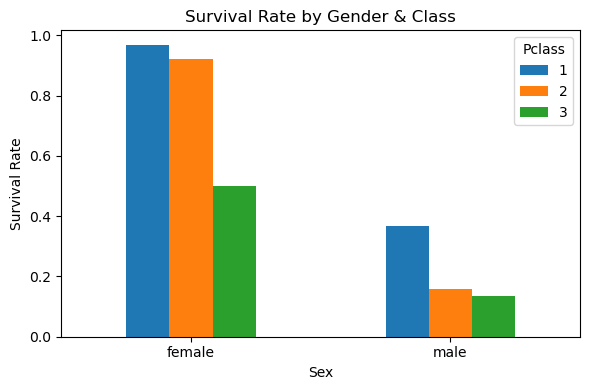


Pivot Table - Average Fare by Class & Embarked Port:
Embarked           C          Q          S
Pclass                                    
1         104.718529  90.000000  70.514244
2          25.358335  12.350000  20.327439
3          11.214083  11.183393  14.644083


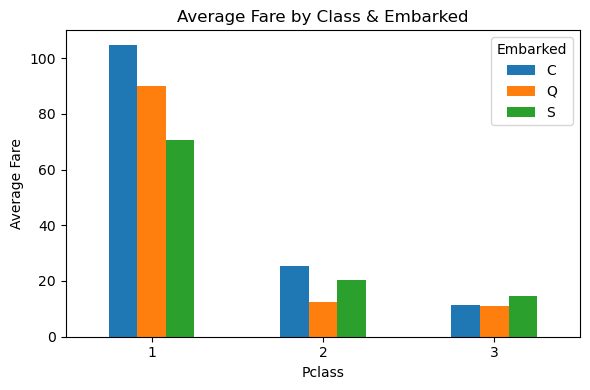

In [4]:
# ======================
# DEEPER INSIGHTS SECTION
# ======================

import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Survival Rate by Gender
print("\nSurvival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

plt.figure(figsize=(6,4))
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("survival_by_gender.png")
plt.show()

# 2️⃣ Survival Rate by Class
print("\nSurvival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean())

plt.figure(figsize=(6,4))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("survival_by_class.png")
plt.show()

# 3️⃣ Survival Rate by Gender & Class (GroupBy)
print("\nSurvival Rate by Gender & Class:")
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())

# 4️⃣ Survival Rate by Gender & Class (Pivot Table)
pivot_gender_class = pd.pivot_table(df, values='Survived',
                                    index='Sex',
                                    columns='Pclass',
                                    aggfunc='mean')
print("\nPivot Table - Survival Rate by Gender & Class:")
print(pivot_gender_class)

pivot_gender_class.plot(kind='bar', figsize=(6,4))
plt.title('Survival Rate by Gender & Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("survival_by_gender_class.png")
plt.show()

# 5️⃣ Average Fare by Class & Embarked
pivot_fare = pd.pivot_table(df, values='Fare',
                            index='Pclass',
                            columns='Embarked',
                            aggfunc='mean')
print("\nPivot Table - Average Fare by Class & Embarked Port:")
print(pivot_fare)

pivot_fare.plot(kind='bar', figsize=(6,4))
plt.title('Average Fare by Class & Embarked')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("fare_by_class_embarked.png")
plt.show()


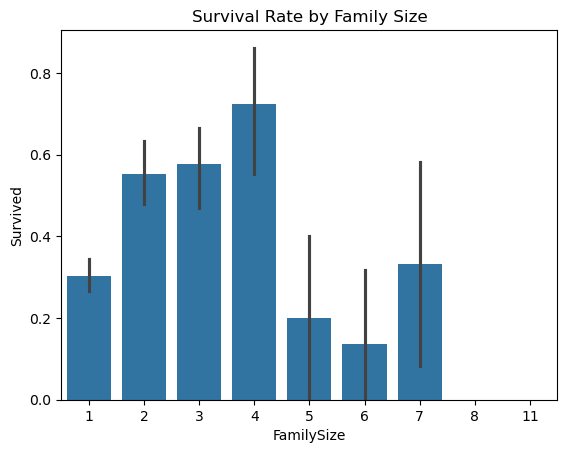

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


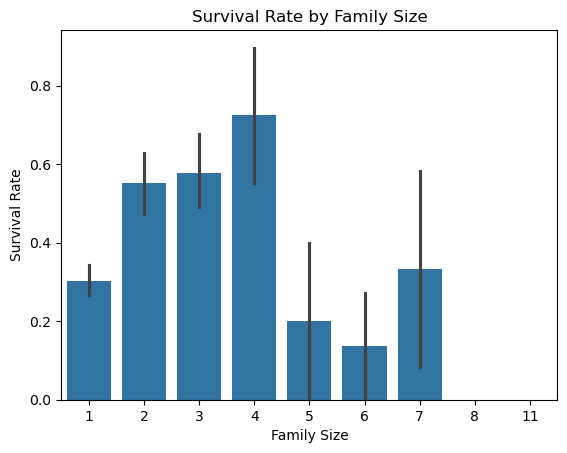

In [7]:
# Create FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()



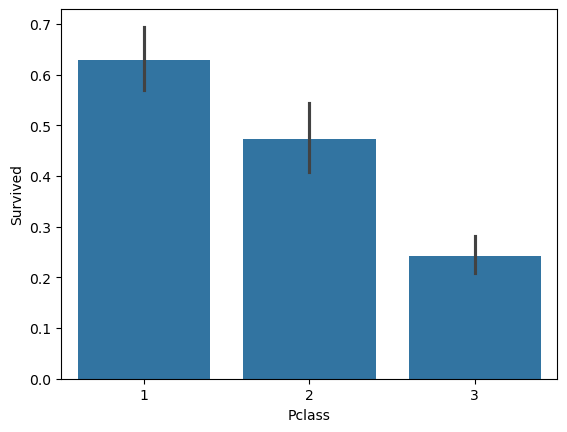

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example chart: Survival rate by Fare
sns.barplot(x='Pclass', y='Survived', data=df)

# Save the chart as an image
plt.savefig("survival_by_class.png", dpi=300, bbox_inches='tight')

plt.show()

In [26]:
# Bonus Point 
#Added Interactive plots


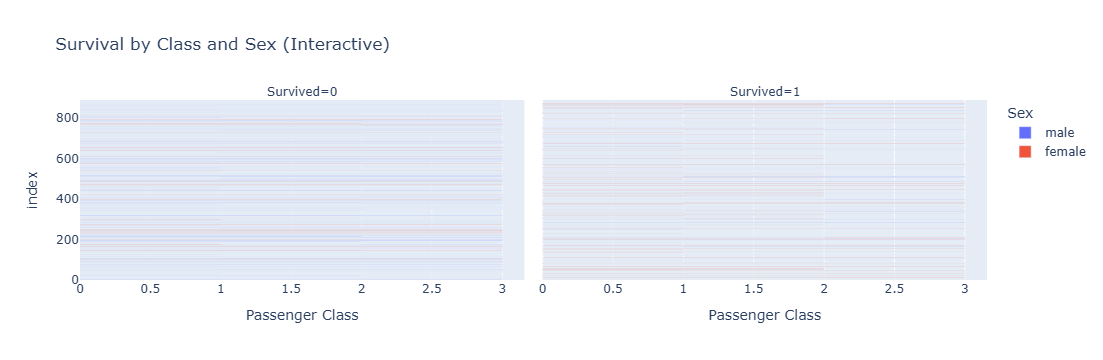

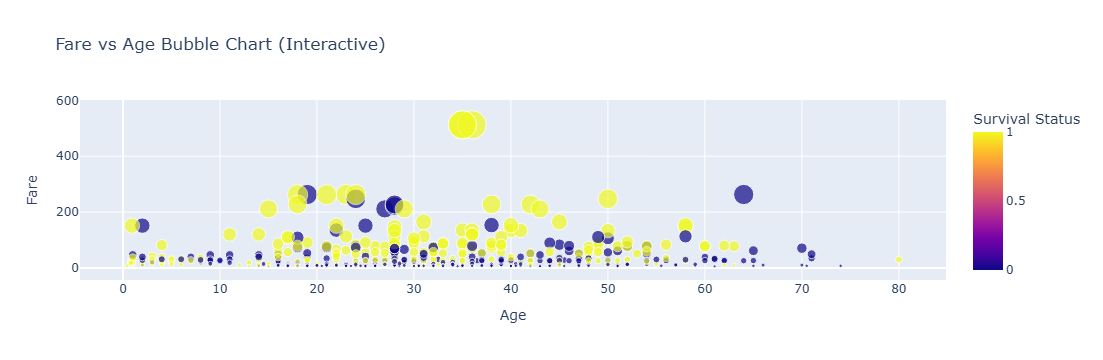

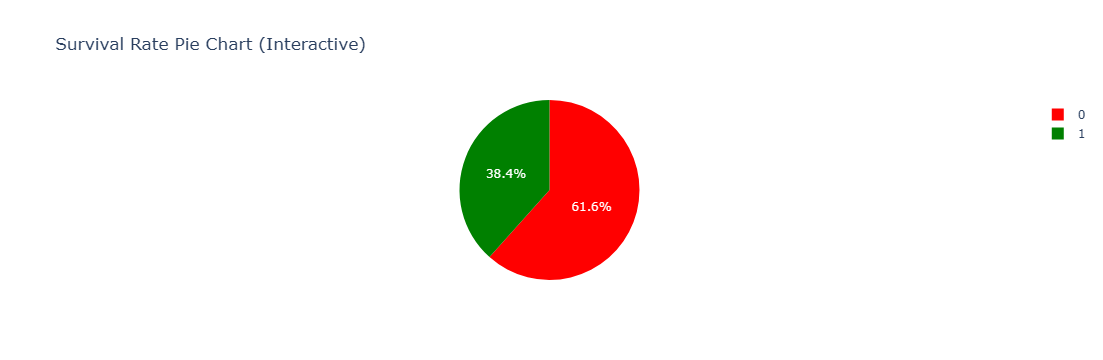

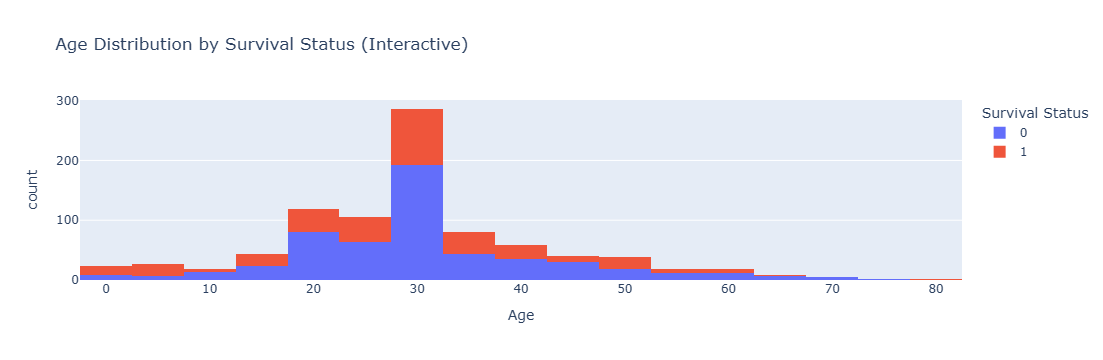

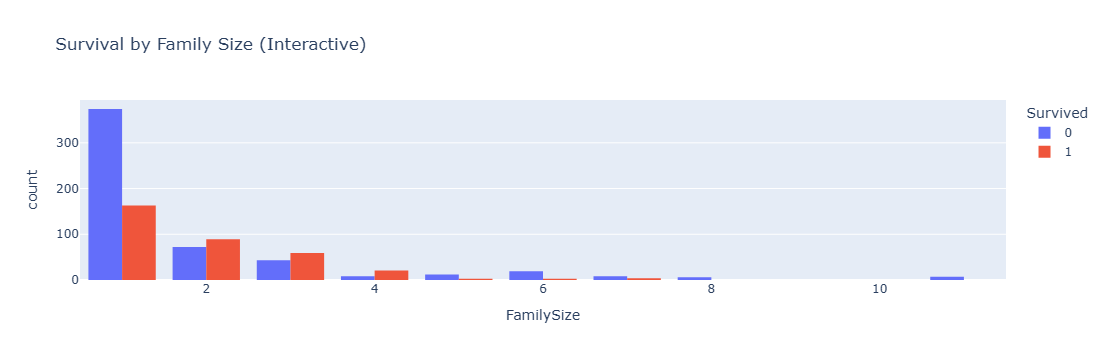

In [25]:
# Install Plotly if not already installed
# !pip install plotly

import plotly.express as px
import plotly.graph_objects as go

# 1. Interactive Survival by Class and Sex
fig1 = px.bar(
    df, 
    x="Pclass", 
    color="Sex", 
    barmode="group",
    facet_col="Survived",
    title="Survival by Class and Sex (Interactive)",
    labels={"Pclass": "Passenger Class", "count": "Number of Passengers"}
)
fig1.show()

# 2. Interactive Fare vs Age Bubble Chart
fig2 = px.scatter(
    df, 
    x="Age", 
    y="Fare", 
    size="Fare", 
    color="Survived",
    hover_name="Name",
    title="Fare vs Age Bubble Chart (Interactive)",
    labels={"Survived": "Survival Status"}
)
fig2.show()

# 3. Interactive Pie Chart for Survival Rate
survival_counts = df['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']
fig3 = px.pie(
    survival_counts, 
    names="Survived", 
    values="Count",
    title="Survival Rate Pie Chart (Interactive)",
    color="Survived",
    color_discrete_map={0: "red", 1: "green"}
)
fig3.show()

# 4. Interactive Histogram of Age
fig4 = px.histogram(
    df, 
    x="Age", 
    nbins=20, 
    color="Survived",
    title="Age Distribution by Survival Status (Interactive)",
    labels={"Survived": "Survival Status"}
)
fig4.show()

# 5. Interactive Grouped Analysis - Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
fig5 = px.histogram(
    df,
    x="FamilySize",
    color="Survived",
    barmode="group",
    title="Survival by Family Size (Interactive)"
)
fig5.show()


In [10]:
## Conclusion

#- **Higher Fare, Higher Survival Rate** — Passengers who paid higher fares had better chances of survival.
#- **Family Size Impact** — Smaller family sizes (1–3 members) had slightly better survival rates compared to solo travelers or large families.
#- **Women and Children First** — Female passengers had a much higher survival rate than male passengers.
#- **First-Class Advantage** — First-class passengers had a significantly higher survival probability.

#**Key Insight:** Socioeconomic status, gender, and family size played a major role in Titanic survival rates.


In [13]:
# Conclusion:
# 1. Higher ticket fares correspond to higher survival rates.
# 2. Females survived more often than males.
# 3. Smaller family sizes had a survival advantage.

#"""
#Final Observation:
#Class, fare, and gender were significant factors in survival outcomes.



In [18]:
### Conclusions from Titanic Survival Analysis

#1. Females had a much higher survival rate than males.
#2. Passengers in 1st class had significantly better survival chances than those in 2nd or 3rd class.
#3. Younger passengers had a higher probability of survival.
#4. Higher fares were correlated with better survival chances.
#5. Family size had a mixed effect — very small or very large families had lower survival rates.



